Import all the required libraries

In [74]:
import pandas as pd
import numpy as np
import requests
import os

import folium # For rendering maps

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # Acquiring latitude and longitude

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')

Imported Libraries.


In [76]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [78]:
df_newyork = get_new_york_data()

In [80]:
df_newyork.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [82]:
df_newyork.shape

(306, 4)

In [84]:
df_newyork[df_newyork['Neighborhood']=='Midtown']

,Borough,Neighborhood,Latitude,Longitude
114,Manhattan,Midtown,40.754691,-73.981669


Using a bar chart, lets get to know the neighborhods in each boroughs 

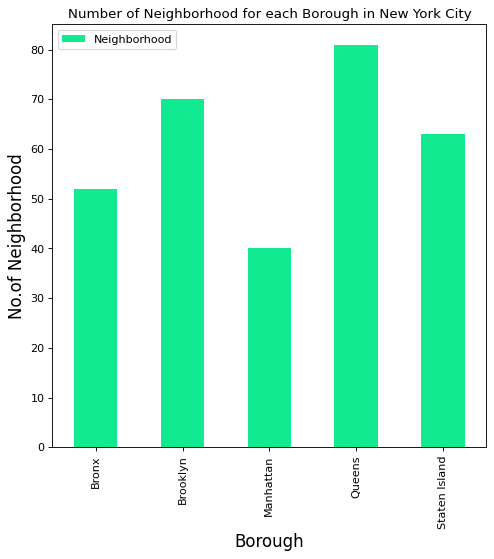

In [86]:
plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_newyork.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Let's define the function that will acquire the latitude and longitude

In [88]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define client credentials and variables

In [90]:
CLIENT_ID = 'WGFER05B5PAJGZIKABILDIBLGDGTTLUTIBOQURDBBSMUWPFB' # your Foursquare ID
CLIENT_SECRET = 'ITRG5ITCYLP3S2DHJRSGWGO4YI1JHFYUOCCAOGFCRPYTKUVT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius= 1000
LIMIT= 100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: WGFER05B5PAJGZIKABILDIBLGDGTTLUTIBOQURDBBSMUWPFB
CLIENT_SECRET:ITRG5ITCYLP3S2DHJRSGWGO4YI1JHFYUOCCAOGFCRPYTKUVT


Define the functions needed for the FourSquare API

In [92]:
def get_venues(lat,lng):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


In [93]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


In [94]:
vns = get_venues(40.754691, -73.981669)
vns[vns['Category']=='Japanese Restaurant']

,ID,Name,Category
40,51fd77be498e883bf20fcca8,OOTOYA 大戸屋 (OOTOYA),Japanese Restaurant


In [95]:
jap_res = vns[vns['Category']=='Japanese Restaurant'].values.tolist()
jap_res

[['51fd77be498e883bf20fcca8', 'OOTOYA 大戸屋 (OOTOYA)', 'Japanese Restaurant']]

In [96]:
len(vns[vns['Category']=='Japanese Restaurant'].values.tolist()) > 0

True

In [97]:
for row in df_newyork.values.tolist():
    print(row)

642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.84789792606271, -73.91967159119565]
['Bronx', 'Fordham', 40.86099679638654, -73.89642655981623]
['Bronx', 'East Tremont', 40.84269615786053, -73.88735617532338]
['Bronx', 'West Farms', 40.83947505672653, -73.87774474910545]
['Bronx', 'High  Bridge', 40.836623010706056, -73.9261020935813]
['Bronx', 'Melrose', 40.819754370594936, -73.90942160757436]
['Bronx', 'Mott Haven', 40.80623874935177, -73.91609987487575]
['Bronx', 'Port Morris', 40.801663627756206, -73.91322139386135]
['Bronx', 'Longwood', 40.81509904545822, -73.8957882009446]
['Bronx', 'Hunts Point', 40.80972987938709, -73.88331505955291]
['Bronx', 'Morrisania', 40

In [98]:
 #prepare neighborhood list that contains ethiopian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)

print('Japanese Restaurants in\n---------------------')
       
for row in df_newyork.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']
    if len(japanese_restaurants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(japanese_restaurants)))
    for restaurant_detail in japanese_restaurants.values.tolist():
        id, name , category=restaurant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed constructing the Japanese cuisine data set')

Japanese Restaurants in
---------------------
Riverdale, Bronx : 2
Kingsbridge, Bronx : 2
City Island, Bronx : 1
High  Bridge, Bronx : 1
Throgs Neck, Bronx : 1
Spuyten Duyvil, Bronx : 2
Castle Hill, Bronx : 1
Bay Ridge, Brooklyn : 2
Bensonhurst, Brooklyn : 4
Gravesend, Brooklyn : 1
Sheepshead Bay, Brooklyn : 2
Manhattan Terrace, Brooklyn : 2
Crown Heights, Brooklyn : 3
Kensington, Brooklyn : 1
Prospect Heights, Brooklyn : 2
Williamsburg, Brooklyn : 2
Bushwick, Brooklyn : 1
Bedford Stuyvesant, Brooklyn : 1
Brooklyn Heights, Brooklyn : 2
Cobble Hill, Brooklyn : 1
Fort Greene, Brooklyn : 1
Park Slope, Brooklyn : 2
Starrett City, Brooklyn : 1
Manhattan Beach, Brooklyn : 1
Bath Beach, Brooklyn : 5
Dyker Heights, Brooklyn : 2
Marine Park, Brooklyn : 1
Clinton Hill, Brooklyn : 4
Downtown, Brooklyn : 2
Boerum Hill, Brooklyn : 2
Midwood, Brooklyn : 2
Georgetown, Brooklyn : 2
East Williamsburg, Brooklyn : 2
North Side, Brooklyn : 2
South Side, Brooklyn : 1
Fort Hamilton, Brooklyn : 4
Hamilton He

In [99]:
japanese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse


In [100]:
japanese_rest_ny.shape

(183, 4)

Visualize the number of restuarants with a bar chart

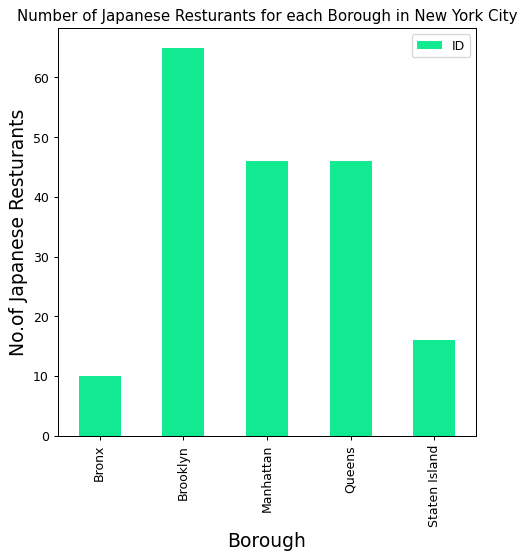

In [102]:
plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Japanese Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Resturants', fontsize=15)
#giving a bar plot
japanese_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

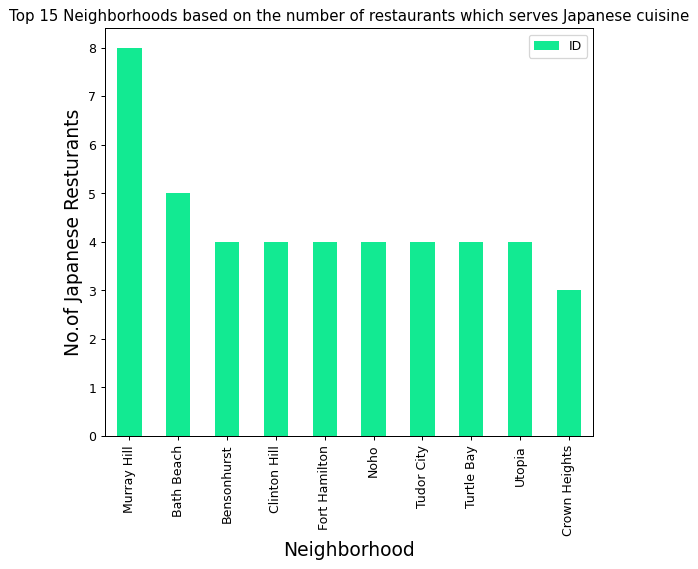

In [103]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 15 Neighborhoods based on the number of restaurants which serves Japanese cuisine')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Resturants', fontsize=15)
#giving a bar plot
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Seems that Murray Hill has the highest number of Japanese restaurants in New York City

In [104]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
78,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
79,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
80,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
81,Manhattan,Murray Hill,540dc46d498e86f0e5059dd2,Zuma New York
82,Manhattan,Murray Hill,48c50c4bf964a520dc511fe3,Café Zaiya
83,Manhattan,Murray Hill,49db8b67f964a520d85e1fe3,Aburiya Kinnosuke
117,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi
118,Queens,Murray Hill,5cf07afa66f3cd002c8b3ae6,Izakaya Mew


In [133]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

KeyError: 'venue'

In [108]:
japanese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.1,19
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan,38,8.4,26
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,32,9.1,19
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan,38,8.4,26
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse,34,7.7,18


In [109]:
japanese_rest_stats_ny.shape

(48, 7)

In [111]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       48 non-null     object 
 1   Neighborhood  48 non-null     object 
 2   ID            48 non-null     object 
 3   Name          48 non-null     object 
 4   Likes         48 non-null     object 
 5   Rating        48 non-null     float64
 6   Tips          48 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [119]:
convert_types = { 'Likes': float, 'Tips': float }
japanese_rest_stats_ny = japanese_rest_stats_ny.astype(convert_types)
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       48 non-null     object 
 1   Neighborhood  48 non-null     object 
 2   ID            48 non-null     object 
 3   Name          48 non-null     object 
 4   Likes         48 non-null     float64
 5   Rating        48 non-null     float64
 6   Tips          48 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


**Restaurant with the most tips**

In [120]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              4c7f0887fb74236a7727f9b9
Name                        Samurai Mama
Likes                                895
Rating                               8.8
Tips                                 244
Name: 28, dtype: object

**Restaurant with the most ratings**

In [121]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                   Riverdale
ID              503cfaffe4b066d39de5005a
Name            Aoyu Japanese Restaurant
Likes                                 32
Rating                               9.1
Tips                                  19
Name: 0, dtype: object

Create a data set with the average rating of all the restaurants in the particular neighborhood of New York city


In [123]:

ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [125]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
9,Cobble Hill,9.10
20,Park Slope,8.85
16,Kingsbridge,8.75
24,Spuyten Duyvil,8.75
22,Riverdale,8.75
4,Brooklyn Heights,8.70
8,Clinton Hill,8.70
12,Fort Greene,8.70
27,Williamsburg,8.45
5,Bushwick,8.40


**Boroughs sorted with high average rating of Japanese cuisine restaurants in New York city**


In [129]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [130]:
ny_borough_stats.sort_values(['Average Rating'], ascending=False).head()

,Borough,Average Rating
0,Bronx,7.540000
1,Brooklyn,7.531579


In [135]:

plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of Japanese Restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

DataError: No numeric types to aggregate

List of neighborhoods with average rating greater than or equal to 9 for Japanese cuisine


In [136]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]


In [137]:
ny_neighborhood_stats

,Neighborhood,Average Rating
9,Cobble Hill,9.1


In [138]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_newyork, on='Neighborhood')

In [139]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]


In [140]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Cobble Hill,40.68792,-73.998561,9.1


**Visual all the data using Folium**

In [141]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [143]:
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [144]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'


In [145]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

Create a choropleth map to visualize the borough based on the average rating for better understanding.



In [147]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
ny_geo = r'Borough Boundaries.geojson'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('rated-map.html')

FileNotFoundError: [Errno 2] No such file or directory: 'Borough Boundaries.geojson'

**Conclusion**
Based on the Data Analysis, here's what we discovered:

Best Neighborhood for opening Restaurant (Japanese Cuisine) in New York:
Cobble Hill	(Brooklyn), Park Slope(Brooklyn), Murray Hill (Manhattan) are the best neighborhoods to open a Japanese Restaurant.
 
Area which lack Japanese Restaurants:
Staten Island ranks last in average rating of Japanese Resturants.

Places with best Japanese Cuisine:
Brooklyn is the best place to stay if you prefer Japanese Cuisine.

Areas with Potential Japanese Restaurants:
Manhattan has a potential Japanese Restaurant Market
